# Large-Scale Structure Calculations

This notebook demonstrates the large-scale structure (LSS) calculations available in the `halox` library. We'll explore RMS variance calculations, mass-to-radius conversions, and overdensity transformations that form the foundation of halo mass function calculations.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from halox import cosmology, lss

jax.config.update("jax_enable_x64", True)

plt.style.use(["seaborn-v0_8-darkgrid", "petroff10"])
plt.rcParams.update({"xtick.direction": "in", "ytick.direction": "in"})

## Setting up the Cosmology

First, let's create a cosmology object using the Planck 2018 parameters provided by halox:

In [2]:
# Create a Planck 2018 cosmology
cosmo = cosmology.Planck18()
print(f"Hubble parameter h = {cosmo.h}")
print(f"Matter density Ω_m = {cosmo.Omega_m}")
print(f"Baryon density Ω_b = {cosmo.Omega_b}")
print(f"Cold dark matter density Ω_c = {cosmo.Omega_c}")
print(f"Power spectrum normalization σ_8 = {cosmo.sigma8}")

Hubble parameter h = 0.6766
Matter density Ω_m = 0.30964
Baryon density Ω_b = 0.04897
Cold dark matter density Ω_c = 0.26067
Power spectrum normalization σ_8 = 0.8102


## Mass-to-Radius Conversion

The Lagrangian radius is the radius of a sphere containing mass M at the mean matter density of the universe at z=0:

$$R = \left(\frac{3M}{4\pi \bar{\rho}_{m,0}}\right)^{1/3}$$

This provides a fundamental length scale associated with a given mass scale in the linear density field.

In [3]:
# Mass range from 10^8 to 10^16 h^-1 M_sun
M = jnp.logspace(8, 16, 100)

# Compute Lagrangian radii
R_lag = lss.mass_to_lagrangian_radius(M, cosmo)

print(f"Mass range: {M.min():.2e} to {M.max():.2e} h^-1 M_sun")
print(f"Lagrangian radius range: {R_lag.min():.2f} to {R_lag.max():.2f} h^-1 Mpc")

# Some characteristic scales
M_char = jnp.array([1e10, 1e12, 1e14, 1e15])
R_char = lss.mass_to_lagrangian_radius(M_char, cosmo)
print("\nCharacteristic mass-radius relationships:")
for m, r in zip(M_char, R_char):
    print(f"  M = {m:.0e} h^-1 M_sun  →  R = {r:.3f} h^-1 Mpc")

Mass range: 1.00e+08 to 1.00e+16 h^-1 M_sun
Lagrangian radius range: 0.07 to 30.29 h^-1 Mpc

Characteristic mass-radius relationships:
  M = 1e+10 h^-1 M_sun  →  R = 0.303 h^-1 Mpc
  M = 1e+12 h^-1 M_sun  →  R = 1.406 h^-1 Mpc
  M = 1e+14 h^-1 M_sun  →  R = 6.525 h^-1 Mpc
  M = 1e+15 h^-1 M_sun  →  R = 14.058 h^-1 Mpc


## Mass-to-Radius Relationship Visualization

<>:9: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:9: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_91877/2426457782.py:9: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
  f"${m:.0e}$ M$_\odot$",


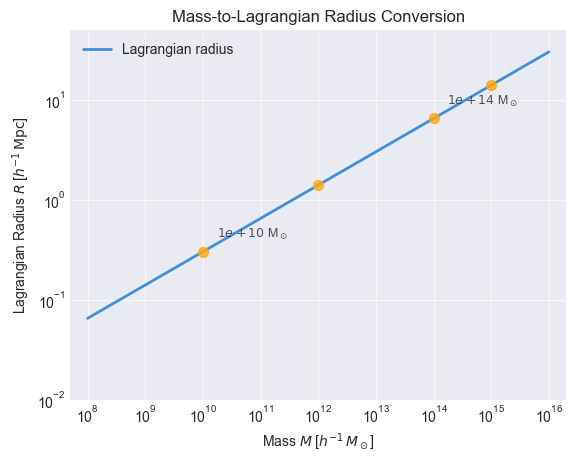

In [4]:
# Plot the mass-radius relationship
fig, ax = plt.subplots()
ax.loglog(M, R_lag, linewidth=2, color="C0", label="Lagrangian radius")

# Add some reference points
ax.scatter(M_char, R_char, color="C1", s=50, zorder=5, alpha=0.8)
for m, r in zip(M_char[::2], R_char[::2]):  # Label every other point
    ax.annotate(
        f"${m:.0e}$ M$_\odot$",
        (m, r),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=9,
        alpha=0.8,
    )

ax.set_xlabel(r"Mass $M$ [$h^{-1} \, M_\odot$]")
ax.set_ylabel(r"Lagrangian Radius $R$ [$h^{-1} \, {\rm Mpc}$]")
ax.set_title("Mass-to-Lagrangian Radius Conversion")
ax.set_xlim(5e7, 2e16)
ax.set_ylim(0.01, 50)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

## RMS Variance Theory

The RMS variance of density fluctuations in spheres of radius R is given by:

$$\sigma^2(R,z) = \frac{1}{2\pi^2} \int_0^\infty k^2 P(k,z) W^2(kR) dk$$

where:
- $P(k,z)$ is the linear matter power spectrum at redshift z
- $W(kR)$ is the spherical top-hat window function:

$$W(x) = \frac{3(\sin x - x \cos x)}{x^3}$$

The variance σ(M,z) is obtained by converting mass M to its corresponding Lagrangian radius.

## Basic Variance Calculation

In [5]:
# Compute sigma(M) at z=0
z = 0.0
sigma_M_z0 = lss.sigma_M(M, z, cosmo)

print(f"σ(M) computed for {len(M)} mass bins at z={z}")
print(f"σ(M) range: {sigma_M_z0.min():.3f} to {sigma_M_z0.max():.3f}")

# Find the characteristic mass where σ(M) = 1 (corresponds to σ_8)
M_star_idx = jnp.argmin(jnp.abs(sigma_M_z0 - 1.0))
M_star = M[M_star_idx]
print(f"\nCharacteristic mass M_* (where σ=1): {M_star:.2e} h^-1 M_sun")
print(f"Corresponding σ_8 normalization: {cosmo.sigma8:.4f}")

σ(M) computed for 100 mass bins at z=0.0
σ(M) range: 0.267 to 5.721

Characteristic mass M_* (where σ=1): 6.58e+13 h^-1 M_sun
Corresponding σ_8 normalization: 0.8102


## Variance as a Function of Mass

<>:3: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:6: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:11: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:3: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:6: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:11: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_91877/911533830.py:3:

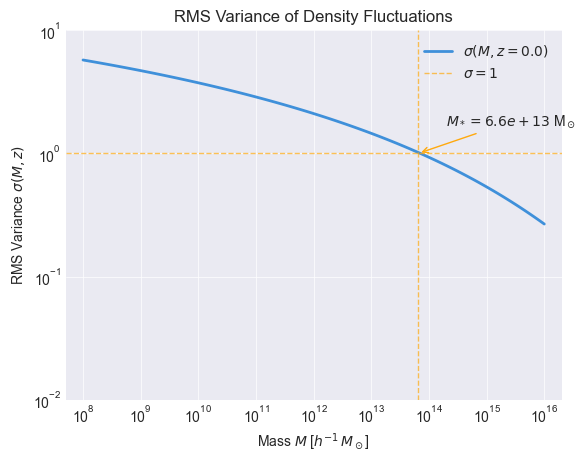

In [6]:
# Plot sigma(M) at z=0
fig, ax = plt.subplots()
ax.loglog(M, sigma_M_z0, linewidth=2, color="C0", label=f"$\sigma(M, z={z:.1f})$")

# Add horizontal line at σ = 1
ax.axhline(1.0, color="C1", linestyle="--", alpha=0.7, label="$\sigma = 1$")
ax.axvline(M_star, color="C1", linestyle="--", alpha=0.7)

# Annotate the characteristic mass
ax.annotate(
    f"$M_* = {M_star:.1e}$ M$_\odot$",
    (M_star, 1.0),
    xytext=(20, 20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="C1"),
    fontsize=10,
)

ax.set_xlabel(r"Mass $M$ [$h^{-1} \, M_\odot$]")
ax.set_ylabel(r"RMS Variance $\sigma(M,z)$")
ax.set_title("RMS Variance of Density Fluctuations")
ax.set_xlim(5e7, 2e16)
ax.set_ylim(0.01, 10)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

## Different Cosmologies

Let's compare σ(M) for different cosmological parameters. We'll vary the matter density and power spectrum normalization:

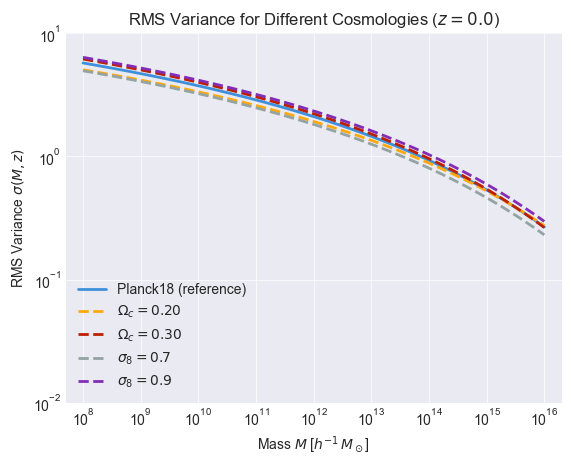

In [7]:
# Create different cosmologies by modifying Planck18 parameters
cosmo_low_Om = cosmology.Planck18(Omega_c=0.20)
cosmo_high_Om = cosmology.Planck18(Omega_c=0.30)
cosmo_low_s8 = cosmology.Planck18(sigma8=0.7)
cosmo_high_s8 = cosmology.Planck18(sigma8=0.9)

cosmologies = [cosmo_low_Om, cosmo_high_Om, cosmo_low_s8, cosmo_high_s8]
labels = [
    r"$\Omega_c = 0.20$",
    r"$\Omega_c = 0.30$",
    r"$\sigma_8 = 0.7$",
    r"$\sigma_8 = 0.9$",
]
colors = ["C1", "C2", "C3", "C4"]

fig, ax = plt.subplots()

# Plot reference Planck18 cosmology
sigma_M_ref = lss.sigma_M(M, z, cosmo)
ax.loglog(
    M,
    sigma_M_ref,
    linewidth=2,
    color="C0",
    label="Planck18 (reference)",
    linestyle="-",
)

# Plot different cosmologies
for _, (cosmo_test, label, color) in enumerate(
    zip(cosmologies, labels, colors)
):
    sigma_M_test = lss.sigma_M(M, z, cosmo_test)
    ax.loglog(
        M, sigma_M_test, linewidth=2, color=color, label=label, linestyle="--"
    )

ax.set_xlabel(r"Mass $M$ [$h^{-1} \, M_\odot$]")
ax.set_ylabel(r"RMS Variance $\sigma(M,z)$")
ax.set_title(f"RMS Variance for Different Cosmologies ($z={z:.1f}$)")
ax.set_xlim(5e7, 2e16)
ax.set_ylim(0.01, 10)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

## Redshift Evolution

Now let's examine how σ(M,z) evolves with redshift. The variance decreases with increasing redshift due to the suppression of structure growth:

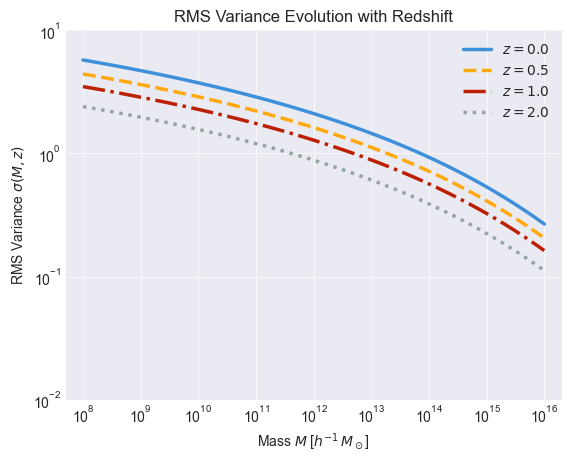

In [8]:
# Different redshifts
redshifts = [0.0, 0.5, 1.0, 2.0]
colors = ["C0", "C1", "C2", "C3"]
linestyles = ["-", "--", "-.", ":"]

fig, ax = plt.subplots()

for z_val, color, ls in zip(redshifts, colors, linestyles):
    sigma_M_z = lss.sigma_M(M, z_val, cosmo)
    ax.loglog(
        M,
        sigma_M_z,
        linewidth=2.5,
        color=color,
        linestyle=ls,
        label=f"$z = {z_val:.1f}$",
    )

ax.set_xlabel(r"Mass $M$ [$h^{-1} \, M_\odot$]")
ax.set_ylabel(r"RMS Variance $\sigma(M,z)$")
ax.set_title("RMS Variance Evolution with Redshift")
ax.set_xlim(5e7, 2e16)
ax.set_ylim(0.01, 10)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

## Variance as a Function of Radius

Let's also examine σ(R,z) directly as a function of radius:

In [9]:
# Radius range from 0.1 to 100 h^-1 Mpc
R = jnp.logspace(-1, 2, 100)
z = 0.0

# Compute sigma(R) at z=0
sigma_R_z0 = lss.sigma_R(R, z, cosmo)

print(f"σ(R) computed for {len(R)} radius bins at z={z}")
print(f"Radius range: {R.min():.2f} to {R.max():.2f} h^-1 Mpc")
print(f"σ(R) range: {sigma_R_z0.min():.3f} to {sigma_R_z0.max():.3f}")

# Find R_8 (radius where σ = σ_8)
R_8_idx = jnp.argmin(jnp.abs(sigma_R_z0 - cosmo.sigma8))
R_8 = R[R_8_idx]
print(f"\nRadius R_8 (where σ = σ_8): {R_8:.3f} h^-1 Mpc")

σ(R) computed for 100 radius bins at z=0.0
Radius range: 0.10 to 100.00 h^-1 Mpc
σ(R) range: 0.066 to 5.139

Radius R_8 (where σ = σ_8): 8.111 h^-1 Mpc


<>:3: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:6: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:3: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:6: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_91877/1111006949.py:3: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  ax.loglog(R, sigma_R_z0, linewidth=2, color="C0", label=f"$\sigma(R, z={z:.1f})$")
/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_91877/111100694

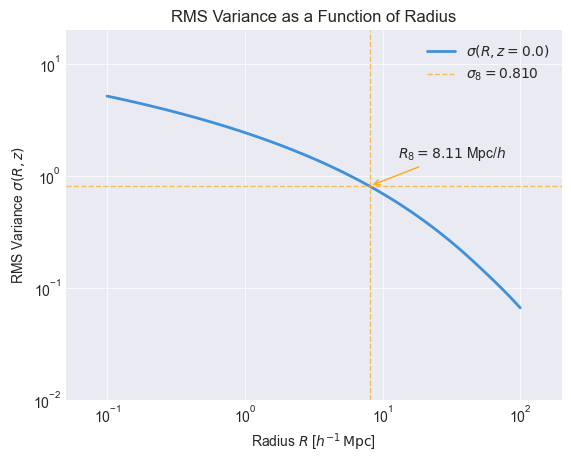

In [10]:
# Plot sigma(R) at z=0
fig, ax = plt.subplots()
ax.loglog(R, sigma_R_z0, linewidth=2, color="C0", label=f"$\sigma(R, z={z:.1f})$")

# Add horizontal line at σ_8 and vertical line at R_8
ax.axhline(cosmo.sigma8, color="C1", linestyle="--", alpha=0.7, label=f"$\sigma_8 = {cosmo.sigma8:.3f}$")
ax.axvline(R_8, color="C1", linestyle="--", alpha=0.7)

# Annotate R_8
ax.annotate(
    f"$R_8 = {R_8:.2f}$ Mpc/$h$",
    (R_8, cosmo.sigma8),
    xytext=(20, 20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="C1"),
    fontsize=10,
)

ax.set_xlabel(r"Radius $R$ [$h^{-1} \, {\rm Mpc}$]")
ax.set_ylabel(r"RMS Variance $\sigma(R,z)$")
ax.set_title("RMS Variance as a Function of Radius")
ax.set_xlim(0.05, 200)
ax.set_ylim(0.01, 20)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

## Overdensity Conversion

In halo mass function calculations, we often need to convert between overdensities defined relative to the critical density (Δc) and those defined relative to the mean matter density (Δm):

$$\Delta_m = \Delta_c \frac{\rho_c(z)}{\rho_m(z)}$$

where ρc(z) is the critical density and ρm(z) is the mean matter density at redshift z.

<>:18: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
<>:18: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_91877/1007491121.py:18: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
  label=f"$\Delta_c = {delta_c:.0f}$",


Overdensity conversions:
  Δc = 200: Δm = 646 (z=0), 256 (z=1)
  Δc = 500: Δm = 1615 (z=0), 639 (z=1)
  Δc = 2500: Δm = 8074 (z=0), 3197 (z=1)


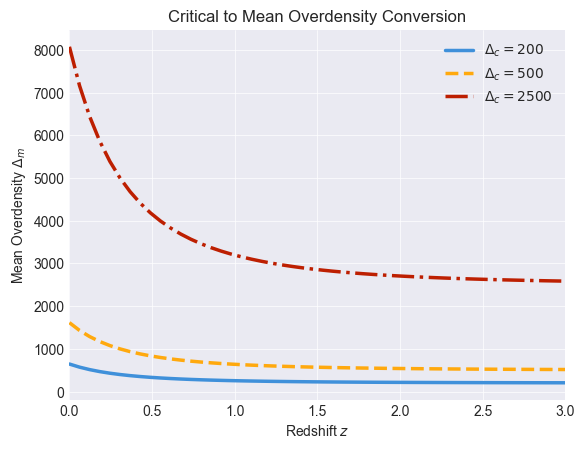

In [11]:
# Common overdensity definitions
delta_c_values = [200.0, 500.0, 2500.0]
redshifts_conv = jnp.linspace(0, 3, 50)

colors = ["C0", "C1", "C2"]
linestyles = ["-", "--", "-."]

fig, ax = plt.subplots()

for delta_c, color, ls in zip(delta_c_values, colors, linestyles):
    delta_m = lss.overdensity_c_to_m(delta_c, redshifts_conv, cosmo)
    ax.plot(
        redshifts_conv,
        delta_m,
        linewidth=2.5,
        color=color,
        linestyle=ls,
        label=f"$\Delta_c = {delta_c:.0f}$",
    )

ax.set_xlabel("Redshift $z$")
ax.set_ylabel(r"Mean Overdensity $\Delta_m$")
ax.set_title("Critical to Mean Overdensity Conversion")
ax.set_xlim(0, 3)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

# Show values at z=0 and z=1
print("Overdensity conversions:")
for delta_c in delta_c_values:
    delta_m_z0 = lss.overdensity_c_to_m(delta_c, 0.0, cosmo)
    delta_m_z1 = lss.overdensity_c_to_m(delta_c, 1.0, cosmo)
    print(f"  Δc = {delta_c:.0f}: Δm = {delta_m_z0:.0f} (z=0), {delta_m_z1:.0f} (z=1)")

## Vectorization

The LSS functions support vectorized operations, allowing efficient computation for multiple masses and redshifts:

Computed σ(M,z) for 50 masses and 5 redshifts
Result shape: (5, 50)


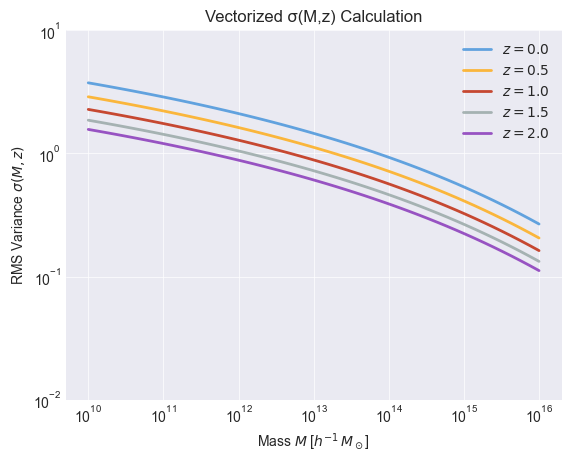

In [12]:
# Vectorized computation for multiple redshifts
M_vec = jnp.logspace(10, 16, 50)  # Mass range
z_vec = jnp.array([0.0, 0.5, 1.0, 1.5, 2.0])

# Use vmap to vectorize over redshift
sigma_M_vec = jax.vmap(
    lss.sigma_M, in_axes=[None, 0, None]
)(M_vec, z_vec, cosmo)

print(f"Computed σ(M,z) for {len(M_vec)} masses and {len(z_vec)} redshifts")
print(f"Result shape: {sigma_M_vec.shape}")

# Plot the results
fig, ax = plt.subplots()

for i, z_val in enumerate(z_vec):
    ax.loglog(
        M_vec,
        sigma_M_vec[i],
        linewidth=2,
        label=f"$z = {z_val:.1f}$",
        alpha=0.8,
    )

ax.set_xlabel(r"Mass $M$ [$h^{-1} \, M_\odot$]")
ax.set_ylabel(r"RMS Variance $\sigma(M,z)$")
ax.set_title("Vectorized σ(M,z) Calculation")
ax.set_xlim(5e9, 2e16)
ax.set_ylim(0.01, 10)
ax.legend()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.grid(True, alpha=1.0)

## Performance: JIT Compilation

Let's compare the performance with and without JIT compilation:

In [16]:
# Setup for timing
M_timing = jnp.logspace(10, 16, 100)
z_timing = 0.0


def compute_sigma(M, z, cosmo=cosmo):
    return lss.sigma_M(M, z, cosmo)

Without JIT compilation:

In [17]:
%timeit _ = compute_sigma(M_timing, z_timing)

539 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


With JIT:

In [18]:
compute_sigma_jit = jax.jit(compute_sigma)
_ = compute_sigma_jit(M_timing, z_timing)
%timeit _ = compute_sigma_jit(M_timing, z_timing)

2.56 ms ± 56.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
